## Coin Flip

In [1]:
import math
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

We have the following data from the trials of coin flips.

In [2]:
outcomes = np.concatenate([np.zeros(4), np.ones(4)])

We can build a probablistic model to describe this  process.

In [3]:
model = pm.Model()

with model:
    
    # Prior
    p = pm.Beta('p', alpha=1, beta=1)

    # Likelihood of observed number of positive tests
    
    like_p = pm.Bernoulli('like_p', p=p, observed=outcomes)

We run the model with some default settings.

In [ ]:
with model:
    
    idata = pm.sample(20000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]


We can check the trace using the inbuilt plotting tool.

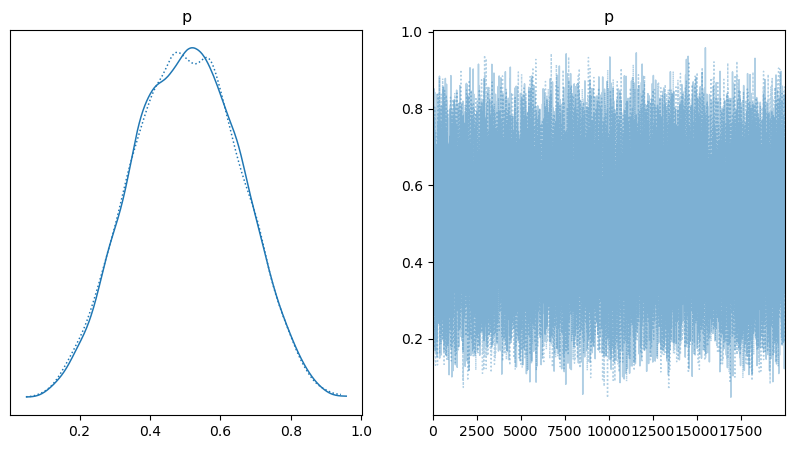

In [5]:
pm.plot_trace(idata, var_names=['p'], figsize=(10,5), combined=False);

In [6]:
pm.summary(idata, var_names=['p']) 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.502,0.15,0.227,0.782,0.001,0.001,15890.0,26747.0,1.0


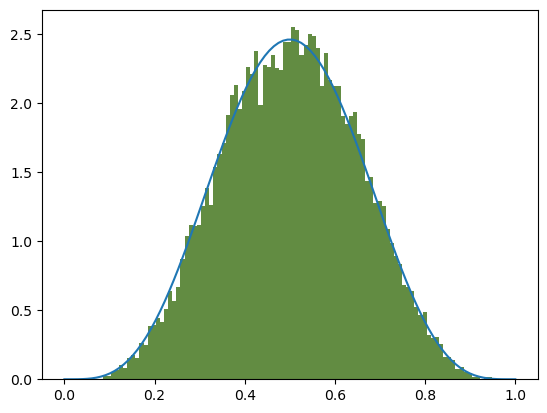

In [7]:
from scipy.stats import beta

STEPS = 100
xs = np.linspace(0, 1, 100)
ys = beta.pdf(xs, 5, 5)
plt.plot(xs, ys)

data = idata.posterior.get('p')[0]
plt.hist(data, bins=100, alpha=0.85, color="#467821", density=True)
plt.show()